In [ ]:
# this will take a few minutes to install, so start doing it, and after that, you can start reading Chapter 2.

# Install NeMo library.
BRANCH = 'r1.21.0'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]

DEPRECATION: git+https://github.com/NVIDIA/NeMo.git@r1.21.0#egg=nemo_toolkit[all] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Cloning https://github.com/NVIDIA/NeMo.git (to revision r1.21.0) to /tmp/pip-install-6buus8h4/nemo-toolkit_cebd26249a894d7da4a839516afb0cd5
  Running command git clone --filter=blob:none --quiet https://github.com/NVIDIA/NeMo.git /tmp/pip-install-6buus8h4/nemo-toolkit_cebd26249a894d7da4a839516afb0cd5
  Running command git checkout -b r1.21.0 --track origin/r1.21.0
  Switched to a new branch 'r1.21.0'
  Branch 'r1.21.0' set up to track remote branch 'r1.21.0' from 'origin'.
  Resolved https://github.com/NVIDIA/NeMo.git to commit c0022aec9c8fedd59458935f0378a775b28d0444
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Prepa

In [ ]:
# Download local version of NeMo scripts. If you are running locally and want to use your own local NeMo code,
# comment out the below lines and set NEMO_DIR to your local path.
NEMO_DIR = 'nemo'
!git clone https://github.com/NVIDIA/NeMo.git $NEMO_DIR

Cloning into 'nemo'...
remote: Enumerating objects: 135877, done.
remote: Counting objects: 100% (4402/4402), done.
remote: Compressing objects: 100% (2191/2191), done.
remote: Total 135877 (delta 2997), reused 3284 (delta 2160), pack-reused 131475
Receiving objects: 100% (135877/135877), 238.77 MiB | 14.89 MiB/s, done.
Resolving deltas: 100% (101159/101159), done.
Updating files: 100% (2074/2074), done.


## 01. Text Normalization

In [ ]:
try:
    from nemo_text_processing.text_normalization.normalize import Normalizer
except ModuleNotFoundError:
    raise ModuleNotFoundError(
        "The package `nemo_text_processing` was not installed in this environment. Please refer to"
        " https://github.com/NVIDIA/NeMo-text-processing and install this package before using "
        "this script"
    )

text_normalizer = Normalizer(input_case="cased", lang="en")

In [ ]:
text = "Mr. Johnson is turning 35 years old on 04-15-2023."
normalized_text = text_normalizer.normalize(text)

print(text)
print(normalized_text)

Mr. Johnson is turning 35 years old on 04-15-2023.
mister Johnson is turning thirty five years old on april fifteenth twenty twenty three.


In [ ]:
### YOUR TASK: test text normalization with several other examples.
# add a sentence with common abbreviations, like 'etc.', 'e.g.', 'ASAP', 'RSVP', ...
# extend the sentence with dates in various formats (e.g. month with numbers / abbreviated)
# extend the sentence with numbers including decimals
# extend the sentence with special characters, like €, $, @,
# ---> and see, which of these are noramlized well. did you find any issues in the text normalization part?

In [ ]:
#Add a Sentence with common abbreviations
text_1 = "As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming."
normalized_text_1 = text_normalizer.normalize(text_1)

print(text_1)
print(normalized_text_1)

As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming.
As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. for example Everyone in Tech Department will be coming.


In [ ]:
#extend the sentence with dates in various formats
text_1 = "As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023"
normalized_text_1 = text_normalizer.normalize(text_1)

print(text_1)
print(normalized_text_1)

As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023
As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. for example Everyone in Tech Department will be coming. The event is on the twenty fifth of december twenty twenty three


In [ ]:
# extend the sentence with numbers including decimals
text_1 = "As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023. There's a symbolic payment of $150.50"
normalized_text_1 = text_normalizer.normalize(text_1)

print(text_1)
print(normalized_text_1)

As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023. There's a symbolic payment of $150.50
As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. for example Everyone in Tech Department will be coming. The event is on the twenty fifth of december twenty twenty three. There's a symbolic payment of one hundred fifty dollars fifty cents


In [ ]:
# extend the sentence with special characters, like €, $, @,
text_1 = "As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023. There's a symbolic payment of $150.50. For more information contact me to acuadrosrivas@edu.bme.com"
normalized_text_1 = text_normalizer.normalize(text_1)

print(text_1)
print(normalized_text_1)

As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023. There's a symbolic payment of $150.50. For more information contact me to acuadrosrivas@edu.bme.com
As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. for example Everyone in Tech Department will be coming. The event is on the twenty fifth of december twenty twenty three. There's a symbolic payment of one hundred fifty dollars fifty cents. For more information contact me to acuadrosrivas at edu dot bme dot com


The issues are that some abbreviations are not in the dictionary of the text normalizer.

## 6. Grapheme to Phoneme (G2P)

In [ ]:
import os
from nemo.collections.tts.g2p.models.en_us_arpabet import EnglishG2p
from nemo.collections.tts.g2p.models.i18n_ipa import IpaG2p

ipa_dict_path = os.path.join(NEMO_DIR, "scripts", "tts_dataset_files", "ipa_cmudict-0.7b_nv23.01.txt")

# EnglishG2p uses the CMU dictionary by default, if none is provided
arpabet_g2p = EnglishG2p()
ipa_g2p = IpaG2p(phoneme_dict=ipa_dict_path)

[NeMo E 2023-11-30 20:18:32 en_us_arpabet:104] Torch distributed needs to be initialized before you initialized EnglishG2p. This class is prone to data access race conditions. Now downloading corpora from global rank 0. If other ranks pass this before rank 0, errors might result.
[NeMo W 2023-11-30 20:18:32 en_us_arpabet:121] English g2p_dict will be used from nltk.corpus.cmudict.dict(), because phoneme_dict_path=None. Note that nltk.corpus.cmudict.dict() has old version (0.6) of CMUDict. You can use the latest official version of CMUDict (0.7b) with additional changes from NVIDIA directly from NeMo using the path scripts/tts_dataset_files/cmudict-0.7b_nv22.10.
[NeMo W 2023-11-30 20:18:33 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2023-

In [ ]:
text = "Hello world"
arpabet_phonemes = arpabet_g2p(text)
ipa_phonemes = ipa_g2p(text)

print(text)
print(arpabet_phonemes)
print(ipa_phonemes)

Hello world
['h', 'e', 'l', 'l', 'o', ' ', 'W', 'ER1', 'L', 'D']
['H', 'E', 'L', 'L', 'O', ' ', 'ˈ', 'w', 'ɝ', 'l', 'd']


In [ ]:
  print(arpabet_g2p.phoneme_dict['hello'])

[['HH', 'AH0', 'L', 'OW1'], ['HH', 'EH0', 'L', 'OW1']]


In [ ]:
arpabet_g2p = EnglishG2p(ignore_ambiguous_words=False)
ipa_g2p = IpaG2p(phoneme_dict=ipa_dict_path, ignore_ambiguous_words=False)

[NeMo E 2023-11-30 20:18:35 en_us_arpabet:104] Torch distributed needs to be initialized before you initialized EnglishG2p. This class is prone to data access race conditions. Now downloading corpora from global rank 0. If other ranks pass this before rank 0, errors might result.
[NeMo W 2023-11-30 20:18:35 en_us_arpabet:121] English g2p_dict will be used from nltk.corpus.cmudict.dict(), because phoneme_dict_path=None. Note that nltk.corpus.cmudict.dict() has old version (0.6) of CMUDict. You can use the latest official version of CMUDict (0.7b) with additional changes from NVIDIA directly from NeMo using the path scripts/tts_dataset_files/cmudict-0.7b_nv22.10.
[NeMo W 2023-11-30 20:18:36 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2023-

In [ ]:
text = "Hello world"
arpabet_phonemes = arpabet_g2p(text)
ipa_phonemes = ipa_g2p(text)

print(text)
print(arpabet_phonemes)
print(ipa_phonemes)

Hello world
['HH', 'AH0', 'L', 'OW1', ' ', 'W', 'ER1', 'L', 'D']
['h', 'ə', 'ˈ', 'l', 'o', 'ʊ', ' ', 'ˈ', 'w', 'ɝ', 'l', 'd']


In [ ]:
### YOUR TASK: get the previous sentence, that is the result of the Text Normalization part!
# and apply G2P (ARPABET) on that sentence
# observe how the words have changes to individual phonemes!

In [ ]:
print(text_1)
arpabet_phonemes_1 = arpabet_g2p(text_1)
ipa_phonemes_1 = ipa_g2p(text_1)

print(arpabet_phonemes_1)
print(ipa_phonemes_1)

As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023. There's a symbolic payment of $150.50. For more information contact me to acuadrosrivas@edu.bme.com
['AE1', 'Z', ' ', 'AH0', ' ', 'N', 'AE1', 'S', 'AH0', ' ', 'c', 'e', 'o', ',', ' ', 'AY1', ' ', 'W', 'IH1', 'L', ' ', 'S', 'T', 'AA1', 'R', 'T', ' ', 'DH', 'AE1', 'T', ' ', 'M', 'IY1', 'T', 'IH0', 'NG', ' ', 'EY1', 'EH1', 'S', 'EY1', 'P', 'IY1', '.', ' ', 'P', 'L', 'IY1', 'Z', ' ', 'r', 's', 'v', 'p', ' ', 'T', 'UW1', ' ', 'DH', 'AH0', ' ', 'IH2', 'N', 'V', 'IH0', 'T', 'EY1', 'SH', 'AH0', 'N', '.', ' ', 'IY1', '.', 'JH', 'IY1', '.', ' ', 'EH1', 'V', 'R', 'IY0', 'W', 'AH2', 'N', ' ', 'IH0', 'N', ' ', 'T', 'EH1', 'K', ' ', 'D', 'IH0', 'P', 'AA1', 'R', 'T', 'M', 'AH0', 'N', 'T', ' ', 'W', 'IH1', 'L', ' ', 'B', 'IY1', ' ', 'K', 'AH1', 'M', 'IH0', 'NG', '.', ' ', 'DH', 'AH0', ' ', 'IH0', 'V', 'EH1', 'N', 'T', ' ', 'IH1', 'Z', ' ', 'AA1', 'N

### 6.1 Tokenization

In [ ]:
from nemo.collections.tts.torch.tts_tokenizers import EnglishPhonemesTokenizer, IPATokenizer

arpabet_tokenizer = EnglishPhonemesTokenizer(arpabet_g2p)
ipa_tokenizer = IPATokenizer(ipa_g2p)

[NeMo W 2023-11-30 20:18:37 experimental:26] `<class 'nemo.collections.common.tokenizers.text_to_speech.tts_tokenizers.IPATokenizer'>` is experimental and not ready for production yet. Use at your own risk.


In [ ]:
print(text_1)
arpabet_tokens_1 = arpabet_tokenizer(text_1)
ipa_tokens_1 = ipa_tokenizer(text_1)


print(arpabet_tokens_1)
print(ipa_tokens_1)

[NeMo W 2023-11-30 20:18:37 tts_tokenizers:477] Text: [AE1Z AH0 NAE1SAH0 ceo, AY1 WIH1L STAA1RT DHAE1T MIY1TIH0NG EY1EH1SEY1PIY1. PLIY1Z rsvp TUW1 DHAH0 IH2NVIH0TEY1SHAH0N. IY1.JHIY1. EH1VRIY0WAH2N IH0N TEH1K DIH0PAA1RTMAH0NT WIH1L BIY1 KAH1MIH0NG. DHAH0 IH0VEH1NT IH1Z AA1N 25/12/2023. DHEH1RZ AH0 SIH0MBAA1LIH0K PEY1MAH0NT AH1V $150.50. FAO1R MAO1R IH2NFER0MEY1SHAH0N KAA1NTAE2KT MIY1 TUW1 acuadrosrivas@EH1DYUW0.bme.KAA1M] contains unknown char/phoneme: [c].Original text: [As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023. There's a symbolic payment of $150.50. For more information contact me to acuadrosrivas@edu.bme.com]. Symbol will be skipped.
[NeMo W 2023-11-30 20:18:37 tts_tokenizers:477] Text: [AE1Z AH0 NAE1SAH0 ceo, AY1 WIH1L STAA1RT DHAE1T MIY1TIH0NG EY1EH1SEY1PIY1. PLIY1Z rsvp TUW1 DHAH0 IH2NVIH0TEY1SHAH0N. IY1.JHIY1. EH1VRIY0WAH2N IH0N TEH1K DIH0PAA1RTMAH0NT WIH1L BIY1 KAH1M

As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023. There's a symbolic payment of $150.50. For more information contact me to acuadrosrivas@edu.bme.com
[26, 23, 0, 27, 0, 12, 26, 16, 27, 0, 41, 0, 30, 0, 21, 34, 10, 0, 16, 18, 25, 15, 18, 0, 4, 26, 18, 0, 11, 35, 18, 34, 13, 0, 33, 31, 16, 33, 14, 35, 42, 0, 14, 10, 35, 23, 0, 18, 39, 0, 4, 27, 0, 34, 12, 20, 34, 18, 33, 17, 27, 12, 42, 0, 35, 42, 8, 35, 42, 0, 31, 20, 15, 35, 21, 27, 12, 0, 34, 12, 0, 18, 31, 9, 0, 3, 34, 14, 25, 15, 18, 11, 27, 12, 18, 0, 21, 34, 10, 0, 1, 35, 0, 9, 27, 11, 34, 13, 42, 0, 4, 27, 0, 34, 20, 31, 12, 18, 0, 34, 23, 0, 25, 12, 0, 48, 48, 42, 0, 4, 31, 15, 23, 0, 27, 0, 16, 34, 11, 1, 25, 10, 34, 9, 0, 14, 33, 11, 27, 12, 18, 0, 27, 20, 0, 42, 42, 0, 5, 28, 15, 0, 11, 28, 15, 0, 34, 12, 5, 32, 11, 33, 17, 27, 12, 0, 9, 25, 12, 18, 26, 9, 18, 0, 11, 35, 0, 18, 39, 0, 31, 3, 22, 39, 42, 42, 9, 25, 11]
[51,

## 7. Spectrogram Synthesis

### 7.1 Audio


### 7.2 Spectrograms

### 7.3 Why use a spectrogram?

In [ ]:
import torch
import IPython.display as ipd
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from nemo.collections.tts.models.base import SpectrogramGenerator, Vocoder

# List pretrained models available in NeMo
print("Spectrogram Models")
print(SpectrogramGenerator.list_available_models())

print()
print("Vocoders")
print(Vocoder.list_available_models())

Spectrogram Models
[PretrainedModelInfo(
	pretrained_model_name=tts_en_fastpitch,
	description=This model is trained on LJSpeech sampled at 22050Hz with and can be used to generate female English voices with an American accent. It is ARPABET-based.,
	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/1.8.1/files/tts_en_fastpitch_align.nemo,
	class_=<class 'nemo.collections.tts.models.fastpitch.FastPitchModel'>
), PretrainedModelInfo(
	pretrained_model_name=tts_en_fastpitch_ipa,
	description=This model is trained on LJSpeech sampled at 22050Hz with and can be used to generate female English voices with an American accent. It is IPA-based.,
	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/IPA_1.13.0/files/tts_en_fastpitch_align_ipa.nemo,
	class_=<class 'nemo.collections.tts.models.fastpitch.FastPitchModel'>
), PretrainedModelInfo(
	pretrained_model_name=tts_en_fastpitch_multispeaker,
	description=This model is trained o

In [ ]:
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

# Remarks:
# - Tacotron2 is a specific text-to-mel-spectogram generator (see DL theoretical lecture slides)
# - HiFiGAN is a specific mel-spectogram-to-audio generator, also called as vocoder (see DL theoretical lecture slides)

# Load our spectrogram and vocoder models onto our CPU
spectrogram_model = SpectrogramGenerator.from_pretrained("tts_en_tacotron2").eval().to(device)
vocoder = Vocoder.from_pretrained("tts_en_hifigan").eval().to(device)

[NeMo I 2023-11-30 20:18:38 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_tacotron2/versions/1.10.0/files/tts_en_tacotron2.nemo to /root/.cache/torch/NeMo/NeMo_1.21.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo
[NeMo I 2023-11-30 20:18:44 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-11-30 20:19:26 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2023-11-30 20:19:26 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /raid/datasets/tts_data/train_manifest.json
      sample_rate: 22050
      sup_data_path: null
      sup_data_types: null
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: 8000
      max_duration: null
      min_duration: 0.1
      ignore_file: null
      trim: false
      

[NeMo I 2023-11-30 20:19:26 features:289] PADDING: 16
[NeMo I 2023-11-30 20:19:26 features:297] STFT using exact pad
[NeMo I 2023-11-30 20:19:27 save_restore_connector:249] Model Tacotron2Model was successfully restored from /root/.cache/torch/NeMo/NeMo_1.21.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo.
[NeMo I 2023-11-30 20:19:27 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_hifigan/versions/1.0.0rc1/files/tts_hifigan.nemo to /root/.cache/torch/NeMo/NeMo_1.21.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo
[NeMo I 2023-11-30 20:19:44 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-11-30 20:19:47 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2023-11-30 20:19:47 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2023-11-30 20:19:47 features:289] PADDING: 0


[NeMo W 2023-11-30 20:19:47 features:266] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2023-11-30 20:19:47 features:289] PADDING: 0


[NeMo W 2023-11-30 20:19:47 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
      warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
    


[NeMo I 2023-11-30 20:19:49 save_restore_connector:249] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.21.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.


In [ ]:
text = "This audio was generated with a text-to-speech model."

# Normalize the text and convert it into individual phonemes/tokens.
tokens = spectrogram_model.parse(text, normalize=True)

# Generate spectrogram from text
spectrogram = spectrogram_model.generate_spectrogram(tokens=tokens)

# Invert the spectrogram into audio samples
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

# Convert output from pytorch tensor to numpy array
spectrogram = spectrogram.cpu().detach().numpy()[0]
audio = audio.cpu().detach().numpy()[0]

In [ ]:
# see the text and listen to the audio, generated by text-to-speech synthesis (using Tacotron2 and HiFiGAN)
print(f'"{text}"\n')

ipd.Audio(audio, rate=22050)

"This audio was generated with a text-to-speech model."



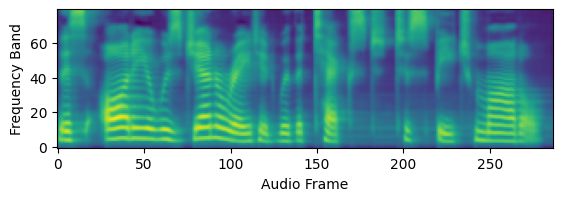

In [ ]:
# Visualize the spectrogram
imshow(spectrogram, origin="lower")
plt.xlabel("Audio Frame")
plt.ylabel("Frequency Band")
plt.show()

In [ ]:
### YOUR TASK:
# in the 'spectrogram_model', disable the text normalization
# get your original sentence, before text normalization
# and convert the un-normalized text to speech with the models above!
# (expected result: you will hear that text processing is an important step of TTS)

In [ ]:
print(text_1)

# Normalize the text and convert it into individual phonemes/tokens.
tokens = spectrogram_model.parse(text_1, normalize=False)

# Generate spectrogram from text
spectrogram = spectrogram_model.generate_spectrogram(tokens=tokens)

# Invert the spectrogram into audio samples
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

# Convert output from pytorch tensor to numpy array
spectrogram = spectrogram.cpu().detach().numpy()[0]
audio = audio.cpu().detach().numpy()[0]

[NeMo W 2023-11-30 20:19:51 tts_tokenizers:477] Text: [as a NAE1SAH0 SIY1IY2OW1, AY1 will STAA1RT that MIY1TIH0NG asap. PLIY1Z rsvp to the IH2NVIH0TEY1SHAH0N. IY1.JHIY1. EH1VRIY0WAH2N in TEH1K DIH0PAA1RTMAH0NT will be KAH1MIH0NG. the event is on 25/12/2023. DHEH1RZ a SIH0MBAA1LIH0K PEY1MAH0NT of $150.50. for MAO1R IH2NFAO2RMEY1SHAH0N KAA1NTAE2KT MIY1 to acuadrosrivas@edu.bme.KAA1M] contains unknown char/phoneme: [2].Original text: [As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023. There's a symbolic payment of $150.50. For more information contact me to acuadrosrivas@edu.bme.com]. Symbol will be skipped.
[NeMo W 2023-11-30 20:19:51 tts_tokenizers:477] Text: [as a NAE1SAH0 SIY1IY2OW1, AY1 will STAA1RT that MIY1TIH0NG asap. PLIY1Z rsvp to the IH2NVIH0TEY1SHAH0N. IY1.JHIY1. EH1VRIY0WAH2N in TEH1K DIH0PAA1RTMAH0NT will be KAH1MIH0NG. the event is on 25/12/2023. DHEH1RZ a SIH0MBAA1LIH0K 

As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023. There's a symbolic payment of $150.50. For more information contact me to acuadrosrivas@edu.bme.com


[NeMo W 2023-11-30 20:19:53 tacotron2:341] Reached max decoder steps 1000.


In [ ]:
print(f'"{text_1}"\n')

ipd.Audio(audio, rate=22050)

"As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023. There's a symbolic payment of $150.50. For more information contact me to acuadrosrivas@edu.bme.com"



Text Processing is an important step of TTS.

In [ ]:
### YOUR TASK:
# write a sentence in your native language, and try to synthesize with Tacotron2 and HiFiGAN.
# can you understand any part of that?
# (expected result: it will be speech-like, but in general with weak quality; because TTS systems depend on the language)

In [ ]:
text_2 = "Eso es todo, mi nombre es Alejandra Cuadros y muchas gracias por asistir a mi TED TALK"

# Normalize the text and convert it into individual phonemes/tokens.
tokens = spectrogram_model.parse(text_2, normalize=True)

# Generate spectrogram from text
spectrogram = spectrogram_model.generate_spectrogram(tokens=tokens)

# Invert the spectrogram into audio samples
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

# Convert output from pytorch tensor to numpy array
spectrogram = spectrogram.cpu().detach().numpy()[0]
audio = audio.cpu().detach().numpy()[0]

In [ ]:
print(f'"{text_2}"\n')

ipd.Audio(audio, rate=22050)

"Eso es todo, mi nombre es Alejandra Cuadros y muchas gracias por asistir a mi TED TALK"



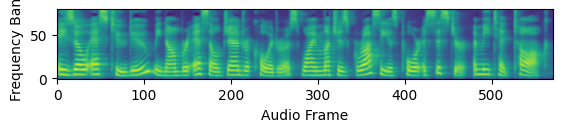

In [ ]:
# Visualize the spectrogram
imshow(spectrogram, origin="lower")
plt.xlabel("Audio Frame")
plt.ylabel("Frequency Band")
plt.show()

### 7.6 Auto Regressive Models

In [ ]:
import torch
from nemo.collections.tts.models import Tacotron2Model

Tacotron2Model.list_available_models()

[PretrainedModelInfo(
 	pretrained_model_name=tts_en_tacotron2,
 	description=This model is trained on LJSpeech sampled at 22050Hz, and can be used to generate female English voices with an American accent.,
 	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_tacotron2/versions/1.10.0/files/tts_en_tacotron2.nemo,
 	class_=<class 'nemo.collections.tts.models.tacotron2.Tacotron2Model'>
 )]

In [ ]:
# this step is a bit slow, might take a few minutes

tacotron2_model = Tacotron2Model.from_pretrained("tts_en_tacotron2").eval().to(device)
tacotron2_model.calculate_loss = False

g2p = EnglishG2p(ignore_ambiguous_words=False)

[NeMo I 2023-11-30 20:19:55 cloud:58] Found existing object /root/.cache/torch/NeMo/NeMo_1.21.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo.
[NeMo I 2023-11-30 20:19:55 cloud:64] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.21.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo
[NeMo I 2023-11-30 20:19:55 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-11-30 20:20:32 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2023-11-30 20:20:32 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /raid/datasets/tts_data/train_manifest.json
      sample_rate: 22050
      sup_data_path: null
      sup_data_types: null
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: 8000
      max_duration: null
      min_duration: 0.1
      ignore_file: null
      trim: false
      

[NeMo I 2023-11-30 20:20:32 features:289] PADDING: 16
[NeMo I 2023-11-30 20:20:32 features:297] STFT using exact pad
[NeMo I 2023-11-30 20:20:33 save_restore_connector:249] Model Tacotron2Model was successfully restored from /root/.cache/torch/NeMo/NeMo_1.21.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo.


[NeMo E 2023-11-30 20:20:33 en_us_arpabet:104] Torch distributed needs to be initialized before you initialized EnglishG2p. This class is prone to data access race conditions. Now downloading corpora from global rank 0. If other ranks pass this before rank 0, errors might result.
[NeMo W 2023-11-30 20:20:33 en_us_arpabet:121] English g2p_dict will be used from nltk.corpus.cmudict.dict(), because phoneme_dict_path=None. Note that nltk.corpus.cmudict.dict() has old version (0.6) of CMUDict. You can use the latest official version of CMUDict (0.7b) with additional changes from NVIDIA directly from NeMo using the path scripts/tts_dataset_files/cmudict-0.7b_nv22.10.
[NeMo W 2023-11-30 20:20:34 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.


In [ ]:
text = "This is an attention map."

tokens = tacotron2_model.parse(text, normalize=True)
token_len = torch.tensor([tokens.shape[1]], dtype=torch.long, device=spectrogram_model.device)

_, _, _, alignments, _ = tacotron2_model.forward(tokens=tokens, token_len=token_len)
alignment = alignments[0].cpu().detach().numpy()

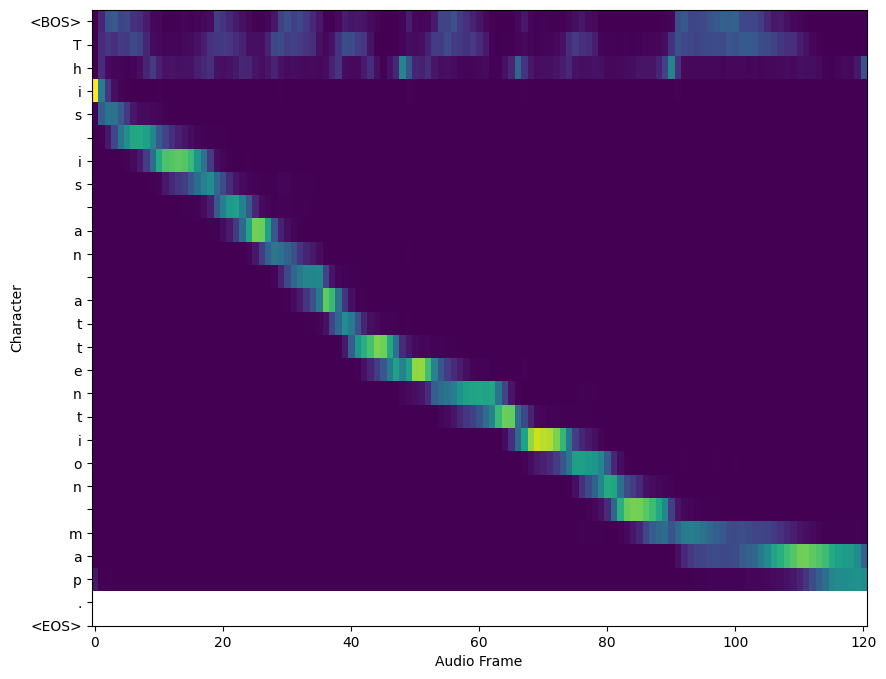

In [ ]:
# Pretrained Tacotron 2 uses grapheme input with beginning-of-speech and end-of-speech tokens
characters = ["<BOS>"] + [char for char in text] + ["<EOS>"]

fig, ax = plt.subplots(figsize=(10, 8))
plt.xlabel("Audio Frame")
plt.ylabel("Character")
_ = ax.imshow(alignment.transpose(), origin='upper', aspect='auto')
_ = ax.set_yticks(range(len(characters)))
_ = ax.set_yticklabels(characters)

In [ ]:
### YOUR TASK: test the attention mechanism on a longer sentence
# (e.g. on one of your earlier examples)

In [ ]:
print(text_1)

tokens = tacotron2_model.parse(text_1, normalize=True)
token_len = torch.tensor([tokens.shape[1]], dtype=torch.long, device=spectrogram_model.device)

_, _, _, alignments, _ = tacotron2_model.forward(tokens=tokens, token_len=token_len)
alignment = alignments[0].cpu().detach().numpy()

As a NASA CEO, I will start that meeting ASAP. Please RSVP to the invitation. e.g. Everyone in Tech Department will be coming. The event is on 25/12/2023. There's a symbolic payment of $150.50. For more information contact me to acuadrosrivas@edu.bme.com


[NeMo W 2023-11-30 20:20:36 tacotron2:341] Reached max decoder steps 1000.


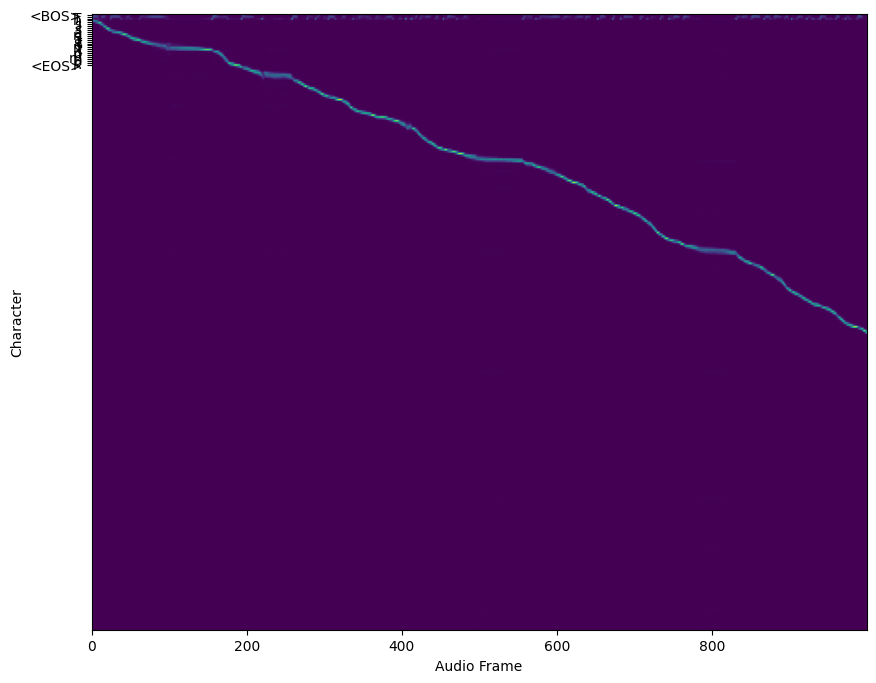

In [ ]:
# Pretrained Tacotron 2 uses grapheme input with beginning-of-speech and end-of-speech tokens
characters = ["<BOS>"] + [char for char in text] + ["<EOS>"]

fig, ax = plt.subplots(figsize=(10, 8))
plt.xlabel("Audio Frame")
plt.ylabel("Character")
_ = ax.imshow(alignment.transpose(), origin='upper', aspect='auto')
_ = ax.set_yticks(range(len(characters)))
_ = ax.set_yticklabels(characters)

### 7.8 Parallel Models


In [38]:
# this step is a bit slow, might take a few minutes

from nemo.collections.tts.models import FastPitchModel

fastpitch_model = FastPitchModel.from_pretrained("tts_en_fastpitch").eval().to(device)

[NeMo I 2023-11-30 20:28:14 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/1.8.1/files/tts_en_fastpitch_align.nemo to /root/.cache/torch/NeMo/NeMo_1.21.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo
[NeMo I 2023-11-30 20:28:25 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-11-30 20:29:11 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2023-11-30 20:29:11 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /ws/LJSpeech/nvidia_ljspeech_train_clean_ngc.json
      sample_rate: 22050
      sup_data_path: /raid/LJSpeech/supplementary
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: 8000
      max_duration: null
      

[NeMo I 2023-11-30 20:29:11 features:289] PADDING: 1
[NeMo I 2023-11-30 20:29:13 save_restore_connector:249] Model FastPitchModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.21.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo.


In [39]:
text = "This audio was generated with the fastpitch text-to-speech model."

# Normalize the text and convert it into individual phonemes/tokens.
tokens = fastpitch_model.parse(text, normalize=True)

# Generate spectrogram from text
spectrogram = fastpitch_model.generate_spectrogram(tokens=tokens)

# Invert the spectrogram into audio samples
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

# Convert output from pytorch tensor to numpy array
spectrogram = spectrogram.cpu().detach().numpy()[0]
audio = audio.cpu().detach().numpy()[0]

In [40]:
print(f'"{text}"\n')

ipd.Audio(audio, rate=22050)

"This audio was generated with the fastpitch text-to-speech model."



In [ ]:
### YOUR TASK: use a single sentence, and synthesize by two models: listen to the audio, and plot the spectrograms!
# - Tacotron2 + HiFiGAN
# - FastPitch + HiFiGAN
# what are the differences that you can hear or see?

In [49]:
text_1 = "My name is Alejandra Cuadros, Thank you for coming to my TED Talk."

In [50]:
# - Tacotron2 + HiFiGAN

# Normalize the text and convert it into individual phonemes/tokens.
tokens = spectrogram_model.parse(text_1, normalize=True)

# Generate spectrogram from text
spectrogram = spectrogram_model.generate_spectrogram(tokens=tokens)

# Invert the spectrogram into audio samples
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

# Convert output from pytorch tensor to numpy array
spectrogram = spectrogram.cpu().detach().numpy()[0]
audio = audio.cpu().detach().numpy()[0]


In [51]:
# Generate text-to-speech synthesis (using Tacotron2 and HiFiGAN)
print(f'"{text_1}"\n')

ipd.Audio(audio, rate=22050)

"My name is Alejandra Cuadros, Thank you for coming to my TED Talk."



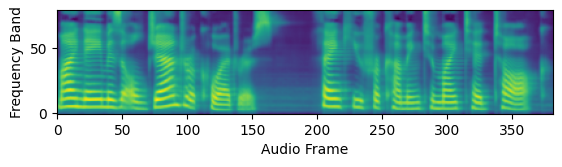

In [52]:
#Visualize the spectogram
imshow(spectrogram, origin="lower")
plt.xlabel("Audio Frame")
plt.ylabel("Frequency Band")
plt.show()

In [58]:
#- FastPitch + HiFiGAN

# Normalize the text and convert it into individual phonemes/tokens.
tokens = fastpitch_model.parse(text_1, normalize=True)

# Generate spectrogram from text
spectrogram = fastpitch_model.generate_spectrogram(tokens=tokens)

# Invert the spectrogram into audio samples
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

# Convert output from pytorch tensor to numpy array
spectrogram = spectrogram.cpu().detach().numpy()[0]
audio = audio.cpu().detach().numpy()[0]

In [59]:
# Generate text-to-speech synthesis (using FastPitch + HiFiGAN)
print(f'"{text_1}"\n')

ipd.Audio(audio, rate=22050)

"My name is Alejandra Cuadros, Thank you for coming to my TED Talk."



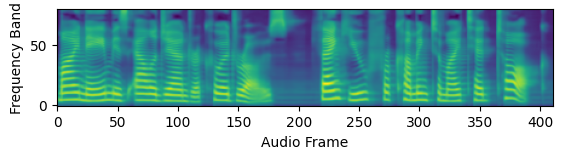

In [55]:
#Visualize the spectogram
imshow(spectrogram, origin="lower")
plt.xlabel("Audio Frame")
plt.ylabel("Frequency Band")
plt.show()

FastPitch + HiFi-GAN significantly improves the naturalness and clarity of the audio compared to Tacotron 2 + HiFi-GAN.

Both of them sound clear and natural, but FastPirch also  has a British Accent.

And also the spectograms are quite similar, but as we can hear, they are not the same.

## 9. Model Evaluation

In [ ]:
### this is the end of the DL practice first part, related to Text-to-Speech